## Introduction to Neural Networks 
### During this presentation we will:

- explain the basics of Neural Networks
- implement a simple NN from scratch using Python and dive into math behind Neural   
  Networks
- implement NN using PyTorch

#### What are artificial neural networks?
Artificial neural networks (ANNs) are software implementations of the neuronal structure of our brains. ANNs are thought to be analogous to the biological neuron, which consists of a neuronal cell body — where the input to the node represents the dendrites and the outputs represent the axon.
![ ](images/biological_vs_arificial.png)
We don’t need to talk about the complex biology of our brain structures, but suffice to say, the brain contains neurons which are kind of like organic switches.The neural network in a person’s brain is a hugely interconnected network of neurons, where the output of any given neuron may be the input to thousands of other neurons. 
Learning occurs by repeatedly activating certain neural connections over others, and this reinforces those connections. This makes them more likely to produce a desired outcome given a specified input. 
Artificial neural networks are not a new concept. In fact, we didn’t even always call them neural networks and they certainly don’t look the same now as they did at their inception. Back during the 1960s we had what was called a perceptron.  Artificial neural networks attempt to simplify and mimic this brain behavior. They can be trained in a supervised or unsupervised manner. In a supervised ANN, the network is trained by providing matched input and output data samples, with the intention of getting the ANN to provide a desired output for a given input. An example is an e-mail spam filter – the input training data could be the count of various words in the body of the email, and the output training data would be a classification of whether the e-mail was truly spam or not. If many examples of e-mails are passed through the neural network this allows the network to learn what input data makes it likely that an e-mail is spam or not. This learning takes place be adjusting the weights of the ANN connections, but this will be discussed further in the next section.
Unsupervised learning in an ANN is an attempt to get the ANN to “understand” the structure of the provided input data “on its own”. This type of ANN will not be discussed in this book. 

Neural Networks consist of the following components

- An input layer, x
- An arbitrary amount of hidden layers
- An output layer, ŷ
- A set of weights and biases between each layer, W and b
- A choice of activation function for each hidden layer, σ. We’ll use a Sigmoid activation function.(for more info of activation function visit <a href= 'https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/'> here </a>

The diagram below shows the architecture of a 2-layer Neural Network (note that the input layer is typically excluded when counting the number of layers in a Neural Network)
![ Artificial Neuron](images/art_neuron.png)



In machine learning terminology, each input to the neuron (x1, x2, … xn) is known as a feature, and each feature is weighted with a number to represent the strength of that input (w1j, w2j, … wnj). The weighted sum of inputs then passes through an activation function, whose general purpose is to model the “firing rate” of a biological neuron by converting the weighted sum into a new number according to a formula. In simple terms, training a neuron refers to iteratively updating the weights associated with each of its inputs so that it can progressively approximate the underlying relationship in the dataset it’s been given. Once properly trained, a neuron can be used to do things like correctly sort entirely new samples — say, images of cats and dogs — into separate buckets, just like people can.

Below is the mathematical formula of  sigmoid function: 


$$
\large f(z) = \frac{1}{1 + e^{(-z)}}
$$

No we can implement it in python:


In [1]:
import matplotlib.pylab  as plt
import numpy as np
x = np.arange (-8, 8, 0.1)
f = 1/ (1 + np.exp(-x))
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

As can be seen in the figure above, the function is “activated” i.e. it moves from 0 to 1 when the input x is greater than a certain value. The sigmoid function isn’t a step function however, the edge is “soft”, and the output doesn’t change instantaneously. This means that there is a derivative of the function and this is important for the training algorithm.
The circle in the image above represents the node. The node is the “seat” of the activation function, and takes the weighted inputs, sums them, then inputs them to the activation function. Note: a node as I have shown above is also called a perceptron in some literature.  What about this “weight” idea that has been mentioned? The weights are real valued numbers (i.e. not binary 1s or 0s), which are multiplied by the inputs and then summed up in the node. So, in other words, the weighted input to the node above would be: 
$$
\begin{align}
w_1 x_1 + w_2 x_2 + w_3 x_3 + b \\
\end{align}
$$

Here the __W__ are weights (ignore the b for the moment). What are these weights all about? Well, they are the variables that are changed during the learning process, and, along with the input, determine the output of the node. The b is the weight of the +1 bias element – the inclusion of this bias enhances the flexibility of the node.
Let’s take an extremely simple node, with only one input and one output: 
![ Artificial Neuron](images/simple.png)
The input to the activation function of the node in this case is simply $w_1 x_1 $ What does changing $w_1 $ do in this simple network? 

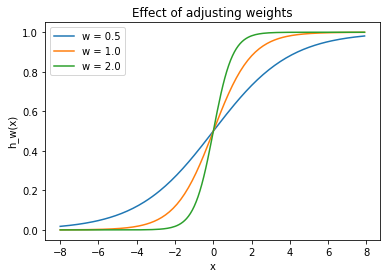

In [2]:
w1, w2, w3 = 0.5, 1.0, 2.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3)]:
    f = 1 / (1+np.exp(-x*w))
    plt.plot(x,f, label = l)
plt.title('Effect of adjusting weights')
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)

plt.show()

Here we can see that changing the weight changes the slope of the output of the sigmoid
activation function, which is obviously useful if we want to model different strengths of
relationships between the input and output variables. However, what if we only want the
output to change when x is greater than 1? This is where the bias comes in – let’s consider
the same network with a bias input: 
![ Artificial Neuron](images/bias.png)


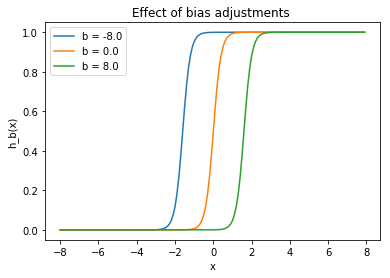

In [3]:
w = 5.0
b1, b2, b3 = -8.0, 0.0, 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1+np.exp(-x*w + b))
    plt.plot(x,f, label = l)
plt.title('Effect of bias adjustments ')
plt.xlabel('x')
plt.ylabel('h_b(x)')
plt.legend(loc=2)
plt.show()

In this case, the $ w_1$ has been increased to simulate a more defined “turn on” function. As you can see, by varying the bias “weight” b, you can change when the node activates. Therefore, by adding a bias term, you can make the node simulate a generic if function, i.e. if (x > z) then 1 else 0. Without a bias term, you are unable to vary the z in that if statement, it will be always stuck around 0. This is obviously very useful if you are trying to simulate conditional relationships. 

Putting all together we can introduce the following structure:
![ Artificial Neuron](images/complex.png)
The three layers of the network can be seen in the above figure – Layer 1 represents the input layer, where the external input data enters the network. Layer 2 is called the hidden layer as this layer is not part of the input or output. Note: neural networks can have many hidden layers, but in this case for simplicity I have just included one. Finally, Layer 3 is the output layer. You can observe the many connections between the layers, in particular between Layer 1 (L1) and Layer 2 (L2). As can be seen, each node in L1 has a connection to all the nodes in L2. Likewise for the nodes in L2 to the single output node L3. Each of these connections will have an associated weight. 


## Create simple network in python

Our neural network will model a single hidden layer with three inputs and one output. In the network, we will be predicting the score of our exam based on the inputs of how many hours we studied and how many hours we slept the day before. Our test score is the output. Here’s our sample data of what we’ll be training our Neural Network on:

In [4]:
import numpy as np
import pandas as pd

pd.DataFrame(np.array(([2,9,92], [1, 5, 86], [3,6,89]), dtype = float),
             columns= ['Hours studied', 'Hours slept', 'test score'])

,Hours studied,Hours slept,test score
0,2.0,9.0,92.0
1,1.0,5.0,86.0
2,3.0,6.0,89.0


Naturally, the right values for the weights and biases determines the strength of the predictions. The process of fine-tuning the weights and biases from the input data is known as training the Neural Network.
Each iteration of the training process consists of the following steps:

* Calculating the predicted output ŷ, known as feedforward
* Updating the weights and biases, known as backpropagation

The sequential graph below illustrates the process.
![ Artificial Neuron](images/scheme.png)


In [5]:
xAll = np.array(([2,9], [1, 5], [3,6], [5, 10]), dtype = float)
y = np.array(([92], [86], [89]), dtype = float)

# scaling units
xAll = xAll/np.amax(xAll, axis=0)
y = y/100

# splitting data into train and test parts
X = np.split(xAll, [3])[0]
xPredicted = np.split(xAll, [3])[1]

##### Feedforward

As we’ve seen in the sequential graph above, feedforward is just simple calculus and for a basic 2-layer neural network mathematically can be represented on this way:

Mathematically above mentioned graph can be represented on this way:

![ Artificial Neuron](images/math.png)

Let's expand out it in explicit matric/vector form for the input layer.

![ Artificial Neuron](images/matrix.png)



In the data set, our input data, X, is a 3x2 matrix. Our output data, y, is a 3x1 matrix. Each element in matrix  X needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron in the hidden layer. Here’s how the first input data element (2 hours studying and 9 hours sleeping) would calculate an output in the network:

![ Artificial Neuron](images/nn-calc.png)
This image breaks down what our neural network actually does to produce an output. First, the products of the random generated weights (.2, .6, .1, .8, .3, .7) on each synapse and the corresponding inputs are summed to arrive as the first values of the hidden layer. These sums are in a smaller font as they are not the final values for the hidden layer.

### (2 \* .2) + (9 \* .8) = 7.6

### (2 \* .6) + (9 \* .3) = 3.9

### (2 \* .1) + (9 * .7) = 6.5

To get the final value for the hidden layer, we need to apply the activation function.

### S(7.6) = 0.999499799

### S(7.5) = 1.000553084

### S(6.5) = 0.998498818

Now, we need to use matrix multiplication again, with another set of random weights, to calculate our output layer value.

### (.9994 \* .4) + (1.000 \* .5) + (.9984 \* .9) = 1.79832

Lastly, to normalize the output, we just apply the activation function again.

### S(1.79832) = .8579443067

And, there you go! Theoretically, with those weights, our neural network will calculate .85 as our test score! However, our target was .92. Our result wasn’t poor, it just isn’t the best it can be. We just got a little lucky when I chose the random weights for this example. How do we train our model to learn? Well, we’ll find out very soon.

However, we still need a way to evaluate the “goodness” of our predictions (i.e. how far off are our predictions)? The Loss Function allows us to do exactly that.

##### Loss Function
There are many available loss functions, and the nature of our problem should dictate our choice of loss function. In this tutorial, we’ll use a simple sum-of-sqaures error as our loss function.
![ Artificial Neuron](images/error.png)
That is, the sum-of-squares error is simply the sum of the difference between each predicted value and the actual value. The difference is squared so that we measure the absolute value of the difference.

Our goal in training is to find the best set of weights and biases that minimizes the loss function.

To figure out which direction to alter our weights, we need to find the rate of change of our loss with respect to our weights. In other words, we need to use the derivative of the loss function to understand how the weights affect the input.
In this case, we will be using a partial derivative to allow us to take into account another variable.


![ Artificial Neuron](images/weightToLoss.svg)

In this case, we will be using a partial derivative to allow us to take into account another variable.

##### Backpropagation

Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.

Here’s how we will calculate the incremental change to our weights:

1. Find the margin of error of the output layer (o) by taking the difference of the predicted output and the actual output (y)

2. Apply the derivative of our sigmoid activation function to the output layer error. We call this result the delta output sum.

3. Use the delta output sum of the output layer error to figure out how much our z2 (hidden) layer contributed to the output error by performing a dot product with our second weight matrix. We can call this the z2 error.

4. Calculate the delta output sum for the z2 layer by applying the derivative of our sigmoid activation function (just like step 2).

5. Adjust the weights for the first layer by performing a dot product of the input layer with the hidden (z2) delta output sum. For the second layer, perform a dot product of the hidden(z2) layer and the output (o) delta output sum.

6. Calculating the delta output sum and then applying the derivative of the sigmoid function are very important to backpropagation. The derivative of the sigmoid, also known as sigmoid prime, will give us the rate of change, or slope, of the activation function at output sum.

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases

Recall from calculus that the derivative of a function is simply the slope of the function.
![ Artificial Neuron](images/gda.png)

If we have the derivative, we can simply update the weights and biases by increasing/reducing with it(refer to the diagram above). This is known as gradient descent.

However, we can’t directly calculate the derivative of the loss function with respect to the weights and biases because the equation of the loss function does not contain the weights and biases. Therefore, we need the chain rule to help us calculate it.
![ Artificial Neuron](images/gradient.png)

Putting these together:
![ Artificial Neuron](images/forward_back.png)
In the forward pass through the network, our data and operations go from bottom to top here. We pass the input $x$ through a linear transformation $L_1$ with weights $W_1$ and biases $b_1$. The output then goes through the sigmoid operation $S$ and another linear transformation $L_2$. Finally we calculate the loss $\ell$. We use the loss as a measure of how bad the network's predictions are. The goal then is to adjust the weights and biases to minimize the loss.

To train the weights with gradient descent, we propagate the gradient of the loss backwards through the network. Each operation has some gradient between the inputs and outputs. As we send the gradients backwards, we multiply the incoming gradient with the gradient for the operation. Mathematically, this is really just calculating the gradient of the loss with respect to the weights using the chain rule.

$$
\large \frac{\partial \ell}{\partial W_1} = \frac{\partial L_1}{\partial W_1} \frac{\partial S}{\partial L_1} \frac{\partial L_2}{\partial S} \frac{\partial \ell}{\partial L_2}
$$


We update our weights using this gradient with some learning rate $\alpha$. 

$$
\large W^\prime_1 = W_1 - \alpha \frac{\partial \ell}{\partial W_1}
$$

The learning rate $\alpha$ is set such that the weight update steps are small enough that the iterative method settles in a minimum.

Here’s the final program:



In [6]:
import numpy as np

# X = (hours studying, hours sleeping), y = score on test
xAll = np.array(([2, 9], [1, 5], [3, 6], [5, 10]), dtype=float) # input data
y = np.array(([92], [86], [89]), dtype=float) # output

# scale units
xAll = xAll/np.amax(xAll, axis=0) # scaling input data
y = y/100 # scaling output data (max test score is 100)

# split data
X = np.split(xAll, [3])[0] # training data
xPredicted = np.split(xAll, [3])[1] # testing data

class Neural_Network(object):
  def __init__(self):
  #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
   

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self):
    print ("Predicted data based on trained weights: ");
    print ("Input (scaled): \n" + str(xPredicted));
    print ("Output: \n" + str(self.forward(xPredicted)));

NN = Neural_Network()
for i in range(101): # trains the NN 10,000 times
    if i%10 == 0:
        print("# " + str(i) + "\n")
        print("Input (scaled): \n" + str(X))
        print("Actual Output: \n" + str(y))
        print("Predicted Output: \n" + str(NN.forward(X)))
        print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss
        print ("\n")
    NN.train(X, y)

    NN.saveWeights()
    NN.predict()

# 0

Input (scaled): 
[[0.4 0.9]
 [0.2 0.5]
 [0.6 0.6]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.82701727]
 [0.79753548]
 [0.83512258]]
Loss: 
0.005186378776591335


Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.84917564]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.8524788]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.85550801]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.85829541]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.86086832]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.86325005]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.86546067]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]
Output: 
[[0.8675175]]
Predicted data based on trained weights: 
Input (scaled): 
[[1. 1.]]


## Implement NN using PyTorch

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='images/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [7]:
from torch import nn, optim
import torch.nn.functional as F
import numpy as np
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


In [8]:
import torch
from torchvision import datasets, transforms


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

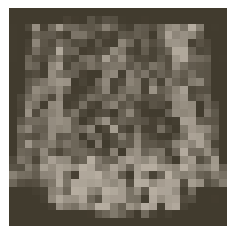

In [9]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

### Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [10]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

### Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) (something like `nn.CrossEntropyLoss` or `nn.NLLLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [11]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5137864108056401
Training loss: 0.3898462164344818
Training loss: 0.35497434875731276
Training loss: 0.33305784274361283
Training loss: 0.31453067449523187


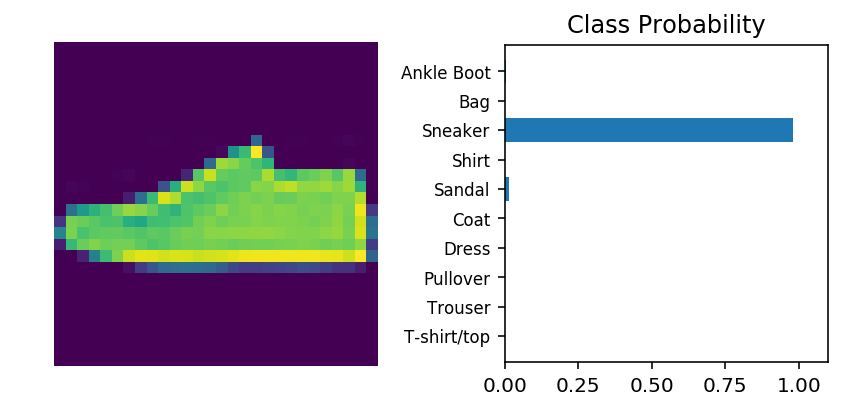

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')